<a href="https://colab.research.google.com/github/hisaylama/Brownian-Simulation/blob/master/Copy_of_New_Homework_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursive technical homework

## Motivation
We hope you have fun doing this task as well as learn something new. 

Do not be discouraged if you find the task challenging. Feel free to research as much as you want on Google or any other resource to solve this task. You are welcome to copy code snippets from stackoverflow, tutorials, blog posts, etc to help you finish the task. Make sure you understand them though :)

It is alright if you don't solve 100% of the tasks, the goal is to push yourself a little and see how you like solving new problems using scientific computing and data analysis.

**About colab**

Please create a duplicate of this notebook using File > Save a Copy in Drive. Share your solution via a link to your local copy of the notebook.

You can solve the entirety of this task using a free kernel running in the cloud. Just click 'Connect' on the top right of the notebook. You can use any python libraries you want *unless* explicitly told to code your own algorithm. If a library you want to use is not already available from the colab runtime, go to 'Help' > 'Search code snippets' > Type 'Importing a library that is not in Colab' to learn how to install a library using pip.

# Part 1
The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) describe the behavior of predator-prey relationships in a closed ecosystem. For this task, we want to develop code to simulate the system given a set of hyperparameters and initial conditions, and visualize the trajectories of the system to gain a better understanding of the model.
Specifically:

* Using numerical integration, solve the coupled system of ODEs:

$$x^\prime = \alpha x - \beta x y$$
$$y^\prime = \delta x y - \gamma y$$

* Plot an example trajectory of the system for some initial conditions and hyperparameters, as well as a phase portrait for the system [example](https://drive.google.com/file/d/1X_zj2YtLDXbppM8tA01K5nMiGt2aOIqS/view?usp=sharing).

### Hint:

* For this part, code your own numerical integration algorithm. Do not use a solver from an existing library (however, you are free to look at the source code of any such library for inspiration).
* The easiest way to do numerical integration is using the [euler method](https://en.wikipedia.org/wiki/Euler_method). It can be an unstable method but for these simple equations it will give you good results.
* To plot a nice phase portrait you need to overlay two plots: a parametric plot $(x(t), y(t))$ and a vector field $(x^\prime(x, y), y^\prime(x, y))$.

In [ ]:
import numpy as np
#import torch
import matplotlib.pyplot as plt


- **Using numerical integration, solve the coupled system of ODEs**

$$x^\prime = \alpha x - \beta x y \, \, ...(i)$$
$$y^\prime = \delta x y - \gamma y \, \, ...(ii)$$

The snippets below numerically solves the `eq. (i) and (ii)` and gives an array of `x,y` for various times.  

In [ ]:
def lotka(x, y, alpha, beta, delta, gamma):

  '''Calculate the Lotka-Volterra ODE.
  
    Inputs: scalar or tensor values, as per the original formula.
    Outputs: scalar our tensor x' and y'.
  ''' 
  #dxdt = alpha*x - beta*x*y = fx
  fx = alpha*x - beta*x*y
  #dydt = delta*x*y - gamma*y = fy
  fy = delta*x*y - gamma*y
  return fx,fy

def integrate_ode(x0, y0, alpha, beta, delta, gamma, time, dt):
  
  '''Integrate the ODE.

    Inputs: initial conditions x0 and y0, hyperparameters:
    alpha, beta, delta, gamma; total time to integrate; discretization
    step dt.

    Outputs: two tensors containing x[t] and y[t]
  '''
  #dt = time/num 
  #num = number of steps
  num = time/dt 
  #print('Number of steps', num)
  #print('-----------------------------------------------')
  xData = []
  yData = []
  tData = []
  for i in range(round(num)):
    [fx, fy] = lotka(x0, y0, alpha, beta, delta, gamma)
    x = x0 + dt*fx
    y = y0 + dt*fy      
    #print('%d \t%.4f\t%.4f\t%0.4f\t%.4f'% (i, x0,y0,fx,x) )
    #print('-----------------------------------------------')
    x0 = x
    y0 = y 
    time = time + dt

    tData.append(time)  
    xData.append(x)
    yData.append(y)
  return xData, yData, tData

#Generate x, y, t data's in 3 coloumns 
x, y, t = integrate_ode(5, 4, 0.9, 0.3, 0.8, 1, 20, 0.01) 
#print("x[t]=",x, "\t", "y[t]=",y)
#t = time 
#Plot the phase space
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as mpl
# fig = plt.figure(figsize = (10,5))
# ax1 = fig.add_subplot(111)
# ax1.scatter(x, y, s=10, c='b', marker="s", label='phase space')
# plt.legend(loc='upper right');
# plt.xlabel('# of prey [x]')
# plt.ylabel('# of predator [y]')
# plt.title('Phase plot')
# mpl.rcParams['font.size'] = 18 
# plt.show()

- **Plot an example trajectory of the system for some initial conditions and hyperparameters, as well as a phase portrait for the system**

I plot the trajectory for `x,y` and `phase space` with the following initial values and parameters.

>> **Initial values**
- x0 = 5,
- y0 = 4, 
- dt = 0.01
- time = 20

>> **Parameter** 
- $\alpha$ = 0.9 
- $\beta$ = 0.3 
- $\delta$ = 0.8 
- $\gamma$ = 1


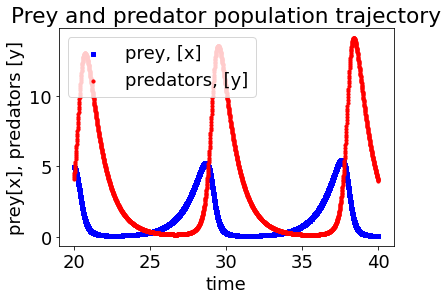

In [ ]:
#Code for plotting the trajectory x and y as a function of 't'
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(t, x, s=10, c='b', marker="s", label='prey, [x]')
ax1.scatter(t,y, s=10, c='r', marker="o", label='predators, [y]')
plt.legend(loc='upper left');
plt.xlabel('time')
plt.ylabel('prey[x], predators [y]')
plt.title('Prey and predator population trajectory')
mpl.rcParams['font.size'] = 18
plt.show()

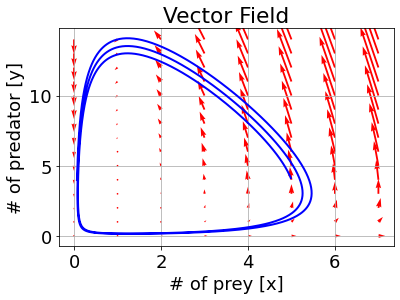

In [ ]:
#Getting the vector Field
alpha = 0.9 
beta = 0.3 
delta = 0.8 
gamma = 1
vectorData = []
for i in range(1, len(x)):
    L = lotka(x[i], y[i], alpha, beta, delta, gamma) 
    #print(L)
    vectorData.append(L)

#Potting the data with prey (x) - predator(y) phase space overlayed on the vector data
import matplotlib.pyplot as plt
plt.plot(x, y, linewidth = 2.0, color = 'blue')
plt.xlabel('# of prey [x]')
plt.ylabel('# of predator [y]')
plt.title('Phase plot')

#Hyperparameter
alpha = 0.9 
beta = 0.3 
delta = 0.8 
gamma = 1

# Meshgrid
x1 = np.arange(0,8,1)
y1 = np.arange(0,15,1)
X,Y = np.meshgrid(x1,y1)

# Assign vector directions
Dx = alpha*X - beta*X*Y
Dy = delta*X*Y - gamma*Y

# Depict illustration
plt.quiver(X,Y,Dx,Dy, color = 'r')
plt.title('Vector Field') 
# Show plot with grid
plt.grid()
plt.show()


# Part 2

Researchers have measured the density of a certain predator and prey in a real savannah, but the equipment was unreliable so the data has gaps as well as noise. The data can be found in [data.csv](https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887) 

In this exercise, we want to train an [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) to regress the full observed trajectory from the measured data. Formally, the MLP will be used to approximate the function $f:\mathbb{R} \rightarrow \mathbb{R}^2 ; f(t) = (x(t), y(t))$. In other words, the model takes the current time as an input, and predicts the values of `x` and `y` at that time based only on the measured data.

### Hint:
* The provided code uses PyTorch. Refer to the tutorial [here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) if you need to learn more about PyTorch.
* You can also ignore the code below and implement this task in a library of your choice such as TensorFlow, JAX or others.
* For this problem you will need to use a regression loss, not a classification loss.



Researchers have measured the density of a certain predator and prey in a real savannah, but the equipment was unreliable so the data has gaps as well as noise. The data can be found in [data.csv](https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887) 

In this exercise, we want to train an [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) to regress the full observed trajectory from the measured data. Formally, the MLP will be used to approximate the function $f:\mathbb{R} \rightarrow \mathbb{R}^2 ; f(t) = (x(t), y(t))$. In other words, the model takes the current time as an input, and predicts the values of `x` and `y` at that time based only on the measured data.

### Hint:
* The provided code uses PyTorch. Refer to the tutorial [here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) if you need to learn more about PyTorch.
* You can also ignore the code below and implement this task in a library of your choice such as TensorFlow, JAX or others.
* For this problem you will need to use a regression loss, not a classification loss.

>>**Solution: I used `TensorFlow` to solve the given problem.**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import the data
url = 'https://gist.githubusercontent.com/tmramalho/51733432c88e2b834dbd70353849f887/raw/676636d9e8512963005a318cb9b98060feadb641/data.csv'
df = pd.read_csv(url,index_col=False)
print(df.head())
print("-------------------------------------------------")
df['x'] = df['x'].apply(lambda x: str(x).replace('-','0'))
df['y'] = df['y'].apply(lambda y: str(y).replace('-','0'))
#Replacing the blank with numerals (zero)
df.fillna(0, inplace=True)

#The data.type is object coonversting it to float type for analysis
df = df.astype(float).round(2)

#Remove the columns wherein x or y values are not available
df= df[df['x'] != 0]
df = df[df['y'] !=0]
print(df.head())

# #Output
Yx = df["y"]
# #input
Xt = df["t"]
#Visualize
#plt.plot(Xt,Yx)

      t                   x                   y
0  0.00                   -  0.5759052335487023
1  0.01                   -                   -
2  0.02  1.1159124144549086                   -
3  0.03                   -                   -
4  0.04  1.0054825084650338  0.4775267298487888
-------------------------------------------------
       t     x     y
4   0.04  1.01  0.48
6   0.06  1.10  0.46
13  0.13  1.02  0.38
18  0.18  1.17  0.35
30  0.30  1.16  0.40


- **Training `x` from the dataset**

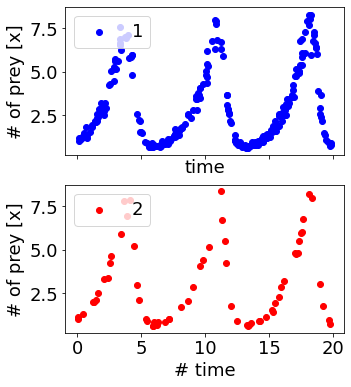

In [ ]:
#Preparing the test and training dataset
#Split the dataset in randomly
from sklearn.model_selection import train_test_split
t_train,t_test,x_train,x_test=train_test_split(df["t"], df["x"],test_size=0.2)

#Visualize the data
fig, ax = plt.subplots(2, figsize = (5,6), sharex=True, sharey=True)
ax[0].scatter(t_train,x_train, color = 'blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("# of prey [x]")
ax[0].legend("1", loc = "upper left")

ax[1].scatter(t_test, x_test, color = 'red')
ax[1].set_xlabel("# time")
ax[1].set_ylabel("# of prey [x]")
ax[1].legend('2', loc = "upper left")

`Note: The scatter plot `1` represents the training dataset and the plot `2` represnts the test dataset.` 

>> **The list of hyperparameters to be used for modelling are as follows:**
- Number of hidden layer(s), 
- Neurons per hidden layer, 
- Activation function = relu, 
- Loss function = mse or mae, 
- Optimizers = Adam
- Learning rate 
- Epoch

>> I use the snippets from the tensorflow website, herein keras tuner is used to optimally search for the optimized number of hidden layer and learning rate. 

**Refererence**: https://www.tensorflow.org/tutorials/keras/keras_tuner

In [ ]:
#Installing keras tuner
!pip install -q -U keras-tuner

In [ ]:
#Hyperparameter search
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=[1]))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 10-100
  hp_units = hp.Int('units', min_value=10, max_value=1000, step=20)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10, activation='relu'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.mse,
                metrics=['mse'])

  return model


In [ ]:
tuner = kt.BayesianOptimization(model_builder,
                         objective=["val_accuracy"],
                         max_trials=80,
                         seed=42)

In [ ]:
tuner.search(df["t"], df["x"], epochs=20, validation_split=0.2)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=10)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 830 and the optimal learning rate for the optimizer
is 0.001.



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


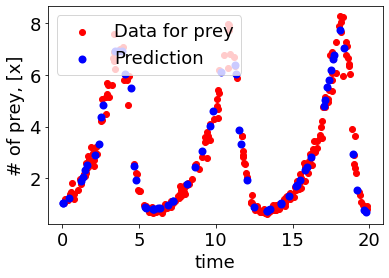

In [ ]:
#Let's  create a model which builds automatically by defining the input shape
tf.random.set_seed(42)
# Setting a random seed, ensures that the “random” initialization of variables are always the same

#1. Create a model
model = tf.keras.Sequential([ 
  tf.keras.layers.Dense(830, activation = "relu", input_shape = [1]), 
  tf.keras.layers.Dense(1000, activation = "relu"), 
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1, activation = "relu") #1 unit (for output layer)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mse,
             optimizer = tf.keras.optimizers.Adam(lr = 0.001),
             metrics = ["mse"])

#3. Fit the model
history = model.fit(tf.expand_dims(t_train, axis = -1), x_train, epochs = 1000, verbose = 0)


#Genertaing a test data to be predicted
test_time = t_test

x_pred = model.predict(test_time)
plt.scatter(t_train, x_train, color = 'red', label = 'Data for prey')
plt.scatter(test_time, x_pred.squeeze(), color = 'blue', linewidth = 2.0, label = 'Prediction')
plt.xlabel("time")
plt.ylabel("# of prey, [x]")
plt.legend(loc = "upper left")
plt.show()

# Plot history (also known as a loss curve)
#pd.DataFrame(history.history).plot()
#plt.ylabel("loss")
#plt.xlabel("epochs");
#plt.show()

>> The test data (`red filled circles`) and the predicted data (`blue filled circles`) one overlaps well.

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 830)               1660      
                                                                 
 dense_53 (Dense)            (None, 1000)              831000    
                                                                 
 dense_54 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_55 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_56 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_57 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_58 (Dense)            (None, 1)               

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(x_test, x_pred.squeeze())
print('Mean absolute error:', mae)

Mean absolute error: tf.Tensor(0.3727605, shape=(), dtype=float32)


In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(x_test, x_pred.squeeze())
print('Mean squared error:', mse)

Mean squared error: tf.Tensor(0.3061894, shape=(), dtype=float32)


- **Training `y` from the dataset**

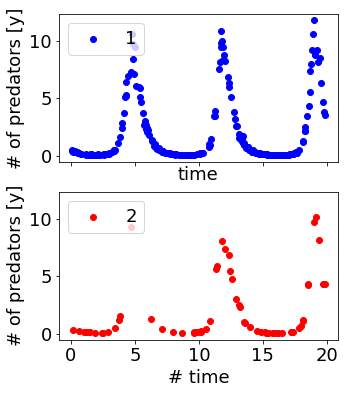

In [ ]:
#Preparing the test and training dataset
#Split the dataset in randomly
from sklearn.model_selection import train_test_split
t_train,t_test,y_train,y_test=train_test_split(df["t"], df["y"],test_size=0.2)

#Visualize the data
fig, ax = plt.subplots(2, figsize = (5,6), sharex=True, sharey=True)
ax[0].scatter(t_train,y_train, color = 'blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("# of predators [y]")
ax[0].legend("1", loc = "upper left")

ax[1].scatter(t_test, y_test, color = 'red')
ax[1].set_xlabel("# time")
ax[1].set_ylabel("# of predators [y]")
ax[1].legend('2', loc = "upper left")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


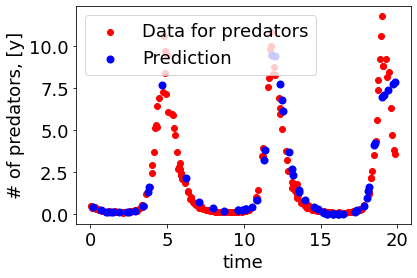

In [ ]:
#Let's  create a model which builds automatically by defining the input shape
tf.random.set_seed(42)
# Setting a random seed, ensures that the “random” initialization of variables are always the same

#1. Create a model
model = tf.keras.Sequential([ 
  tf.keras.layers.Dense(830, activation = "relu", input_shape = [1]), 
  tf.keras.layers.Dense(1000, activation = "relu"), 
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1, activation = "relu") #1 unit (for output layer)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mse,
             optimizer = tf.keras.optimizers.Adam(lr = 0.001),
             metrics = ["mse"])

#3. Fit the model
history = model.fit(tf.expand_dims(t_train, axis = -1), y_train, epochs = 1000, verbose = 0)


#Genertaing a test data to be predicted
test_time = t_test

y_pred = model.predict(test_time)
plt.scatter(t_train, y_train, color = 'red', label = 'Data for predators')
plt.scatter(test_time, y_pred.squeeze(), color = 'blue', linewidth = 2.0, label = 'Prediction')
plt.xlabel("time")
plt.ylabel("# of predators, [y]")
plt.legend(loc = "upper left")
plt.show()

# Plot history (also known as a loss curve)
#pd.DataFrame(history.history).plot()
#plt.ylabel("loss")
#plt.xlabel("epochs");
#plt.show()

>> The test data (red filled circles) and the predicted data (blue filled circles) one overlaps well.

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 830)               1660      
                                                                 
 dense_74 (Dense)            (None, 1000)              831000    
                                                                 
 dense_75 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_76 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_77 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_78 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_79 (Dense)            (None, 1)               

## **Answers to questions:**
>> Please answer the questions about the exercise below as a text cell. A few sentences answer per question is enough, no need to write a long essay.
  
**(a) Roughly, how many parameters does the neural network you defined above have? How did you estimate that number?**


>> Neurons decides parameters by themselves based on our initial choice of hyperparameters.

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 96)                192       
                                                                 
 dense_46 (Dense)            (None, 1000)              97000     
                                                                 
 dense_47 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_48 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_49 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_50 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_51 (Dense)            (None, 1)               

`Neurons decides parameters by themselves based on our initial choice of hyperparameters.`

**(b) How does changing the batch size affect the optimization procedure?**
>> The displayed results are with `train:test` dataset in a ratio `0.8:0.2`. For batch sizes with ratio's `0.6:0.4, 0.7:0.3, 0.8:0.2, 0.9:01`, the optmization process is not so much affected with the same hyperparameters. For details please see the **Appendix** (end of the colab file) . 

**(c) What optimizer did you choose and why? Explain its most important hyperparameters.**

>> I use `Adam optimizers` for this analysis because it has fewer hyper parameters and faster computation time. The most crucial hyperparameter for this is the `learning rate`. Here the `learning rate` is chosen as `0.0001`.

**(d) What difficulties did you face when processing the dataset? How did you resolve them?**

>> The most challenging part is selecting the correct hyperparameters. To solve this problem, I used optimizing  `BayesianOptimization` and `keras_tuner` from Keras. This gives me a rough estimate of the number of units in the first layer and the possible learning rate. Still, I did the manual optimization to choose the right set of hyperparameters. 

**(e) How did you find the hyperparameters that gave you the best result? What would you have done if you had more time?**

>> To solve this problem I used optimizing `keras_tuner` from `keras`. This gives me a rough estimate of the number of units in the first layer together with the possible `learning rate`. Still the manual optiimization was done to choose the right set of hyperparameters. If I had more time then I possibly try more with different optimization processes.

**(f) In this exercise, we trained an MLP to regress the data from a single time point. This corresponds to assuming the source function is markovian. What would we do differently if the function under study were non-markovian?** 

>> If the source function is non-markovian, then we need a memory kernel to handle the perceptron's information on past time—methods such as recurrent neural network (RNN) or autoregressive neural network (AR-NET) are useful in such cases.

**(g) In this exercise, we did not check for overfitting. How would you change the code above to test for that possibility?**

>> To check the `overfitting`, one must plot the `loss function` as a function of `epochs` for both the training dataset and the cross-validation dataset (part of a real dataset). If the model `overfits` the data, we will observe that the `loss function` from the cross-validation dataset does not decrease with `epochs` while the training dataset continues to.

>> To prevent 'overfitting`, one needs to use a method such as `regularization`. 

[Reference](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#:~:text=To%20prevent%20overfitting%2C%20the%20best,data%20will%20naturally%20generalize%20better.)

In [ ]:
#TODO plot the neural network output vs. the training data
#If you trained successfuly you should see something like this
#https://drive.google.com/file/d/1yNtJ6TcW51SkAYk0KlP-riUFzO1mfufa/view?usp=sharing



```
# The give code
import os
import torch
from torch import nn
from torch.utils.data 
import DataLoader

from torchvision import datasets, transforms''''
class Net(nn.Module):
'''Model to regress 2d time series values given scalar input.'''
    def __init__(self):
        super(Net, self).__init__()
        #TODO
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),)
    def forward(self, x):
        #TODO
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits"

        model = Net()
        print(model)
```


```
class TimeSeriesDataset(torch.utils.data.Dataset):

    def __init__(self, csv_file, targets):
      self.csv_file = csv_file
      self.targets = targets
        
    def __len__(self):
      return len(self.csv_file)
        
    def __getitem__(self, idx):
      target = self.targets[idx]    


dataset = TimeSeriesDataset('data.csv')
trainloader = torch.utils.data.DataLoader(
dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

def loss(outputs, labels):
  #TODO
    optimizer = #TODO what is a good optimizer?
    net = Net()
    for epoch in range(300):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # TODO get the data

        # TODO stochastic gradient descent
        
        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

       print('Finished Training')
```



## **Questions**

Please answer the questions about the exercise below as a text cell. A few sentences answer per question is enough, no need to write a long essay.
  
- a) Roughly, how many parameters does the neural network you defined above have? How did you estimate that number?
- b) How does changing the batch size affect the optimization procedure?
- c) What optimizer did you choose and why? Explain its most important hyperparameters.
- d) What difficulties did you face when processing the dataset? How did you resolve them?
- e) How did you find the hyperparameters that gave you the best result? What would you have done if you had more time?
- f) In this exercise, we trained an MLP to regress the data from a single time point. This corresponds to assuming the source function is markovian. What would we do differently if the function under study were non-markovian?
- g) In this exercise, we did not check for overfitting. How would you change the code above to test for that possibility?


# Part 3

In this section, we want to train a generative model of the above Lotka-Volterra equations. While there are many approaches to create a generative model, here we focus on creating an autoregressive model, i.e. $f_{t+1} = g(f_t, f_{t-1}, ...)$ where $g$ is a suitable neural network architecture.

You are provided with some code that achieves this goal. However, the code is riddled with several subtle bugs that prevent proper training. Your task is to fix all the bugs such that the model trains correctly, and demonstrate the correctness of the trained model by plotting a sample of the model.

In [ ]:
!pip install x-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
CUDA_LAUNCH_BLOCKING=1.

In [ ]:
import torch
import torch.optim as optim
from x_transformers import AutoregressiveWrapper, TransformerWrapper, Decoder

n_bins = 20
n_tokens = n_bins * n_bins

def convert_to_tokens(x, y, n_bins):
  digit_x = np.digitize(np.log(x), np.linspace(-3, 3, n_bins))
  digit_y = np.digitize(np.log(y), np.linspace(-3, 3, n_bins))
  return digit_y*n_bins + digit_y

model = TransformerWrapper(
    num_tokens = n_tokens,
    max_seq_len = 1024,
    attn_layers = Decoder(
        dim = 10,
        depth = 6,
        heads = 8
    )
).cuda()

optimizer = optim.Adam(model.parameters(), lr=1e-3) #Learning rate was changed


RuntimeError: ignored

In [ ]:
for epoch in range(2):
    running_loss = 0.01
    for i in range(200):
        x0 = np.random.uniform(0.1, 5)
        y0 = np.random.uniform(0.1, 5)
        x, y, t = integrate_ode(x0, y0, 0.9, 0.3, 0.8, 1, 10, 0.01)
        inputs = convert_to_tokens(x, y, n_bins)
        #print(inputs)
        inputs = torch.tensor(inputs).unsqueeze(0).cuda()
        
  
        logits = model(inputs).transpose(1, 2)
        loss = torch.nn.functional.cross_entropy(logits, inputs)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 20 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.01

print('Finished Training')

RuntimeError: ignored

In [ ]:
decoder_model = AutoregressiveWrapper(model)

In [ ]:
sample = decoder_model.generate(torch.tensor([315]).cuda(), 1000)
#TODO: reverse tokenization and plot the sample

## **Questions**
- **Please explain which bugs you fixed and why they were a problem.**

>> The program ran when I changed the learning rate from `0.1` to `0.001`. However, I am not sure whether I fixed the problem, but the certainy learning rate was too large for training the dataset. H

## **Appendix**

In [ ]:

#Function to evaluate the prediction after training the dataset
def predictions(t_train, y_train, t_test):
  tf.random.set_seed(42)
  #Setting a random seed, ensures that the “random” initialization of variables are always the same

  #1. Create a model
  model_2 = tf.keras.Sequential([ 
  tf.keras.layers.Dense(950, activation = "relu", input_shape = [1]), 
  tf.keras.layers.Dense(1000, activation = "relu"), 
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1000,activation = "relu"),  
  tf.keras.layers.Dense(1, activation = "relu") #1 unit (for output layer)
  ])
  #2. Compile the model
  model_2.compile(loss = tf.keras.losses.mse,
           optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
             metrics = ["mse"])
  #3. Fit the model
  history = model_2.fit(tf.expand_dims(t_train, axis = -1), y_train, epochs = 1000, verbose = 0)
  y_predict = model_2.predict(t_test)

  return y_predict

#Split the dataset in randoml in a different fraction of training and test dataset
from sklearn.model_selection import train_test_split
t_train_1,t_test_1,y_train_1,y_test_1=train_test_split(df["t"],df["y"],test_size=0.1) #90/10
t_train_2,t_test_2,y_train_2,y_test_2=train_test_split(df["t"],df["y"],test_size=0.2) #80/20
t_train_3,t_test_3,y_train_3,y_test_3=train_test_split(df["t"],df["y"],test_size=0.3) #70/30
t_train_4,t_test_4,y_train_4,y_test_4=train_test_split(df["t"],df["y"],test_size=0.4) #60/40

#Predicted values of y at different ratio's
y_pred_1 = predictions(t_train_1, y_train_1, t_test_1)
y_pred_2 = predictions(t_train_2, y_train_2, t_test_2)
y_pred_3 = predictions(t_train_3, y_train_3, t_test_3)
y_pred_4 = predictions(t_train_4, y_train_4, t_test_4)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Defining the functions for mean absolute error and mean square error
def mae(y_test, y_pred):
  """
  Calculates mean absolute error between y_test and y_preds
  """
  output = tf.metrics.mean_absolute_error(y_test,y_pred)
  return output

def mse(y_test, y_pred):
  """
  Caluclates mean squared error between y_test and y_preds
  """
  output = tf.metrics.mean_squared_error(y_test, y_pred)
  return output

mae_1 = mae(y_test_1, y_pred_1.squeeze())
mse_1 = mse(y_test_1, y_pred_1.squeeze())
mae_2 = mae(y_test_1, y_pred_1.squeeze())
mse_2 = mse(y_test_1, y_pred_1.squeeze())
mae_3 = mae(y_test_1, y_pred_1.squeeze())
mse_3 = mse(y_test_1, y_pred_1.squeeze())
mae_4 = mae(y_test_1, y_pred_1.squeeze())
mse_4 = mse(y_test_1, y_pred_1.squeeze())


batch_results = [["batch_1", mae_1, mse_1],
                  ["batch_2", mae_2, mse_2],
                  ["batch_3", mae_3, mae_3],
                  ["batch_4", mae_4, mae_4]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(batch_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,batch_1,"tf.Tensor(1.0285283, shape=(), dtype=float32)","tf.Tensor(2.5352159, shape=(), dtype=float32)"
1,batch_2,"tf.Tensor(1.0285283, shape=(), dtype=float32)","tf.Tensor(2.5352159, shape=(), dtype=float32)"
2,batch_3,"tf.Tensor(1.0285283, shape=(), dtype=float32)","tf.Tensor(1.0285283, shape=(), dtype=float32)"
3,batch_4,"tf.Tensor(1.0285283, shape=(), dtype=float32)","tf.Tensor(1.0285283, shape=(), dtype=float32)"


>> From the above table, it appears that it hardly changes for a given set of batch sizes. So, I believe the amount of data is minimal for training and making predictions.